# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Use of RFM method as a segmentation reference](#Use-of-RFM-method-as-a-segmentation-reference)
- [Pickling dataframes](#Pickling-dataframes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [2]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_dataset_merged.pkl")

## Use of RFM method as a segmentation reference

### Introduction to RFM method for market research

So far we have created a dataframe that contains the main indicators that we will use for our analysis. 

For the clients segmentation we will start by using a method called RFM, which is widely used for customer analysis in market research.

**We will use the RFM method to compare the clients segmentation with other clustering methods, such as K-means.**

**RFM** stands for the three dimensions:

* **Recency** – How recently did the customer purchase?
* **Frequency** – How often do they purchase?
* **Monetary Value** – How much do they spend?

See reference: https://en.wikipedia.org/wiki/RFM_(market_research)

To compute the **Recency**, we will compute the number of days that has been since the a customer placed an order. The **frequency**  will be refered to the number of orders that a customer placed, and the **Monetary value** is the order payment value.

### Creation of RFM table

In [3]:
rfm_df =  new_df_for_segmentation_analysis.copy()

We already have the Frequence, which is the variable 'number_of_orders_for_a_customer'. Now we will compute the number of days that have past from a customer's last order placement. The monetary value is given by the variable 'payment_value_for_a_customer_order'.

In [4]:
columns_for_rfm = ['order_id', 
                    'customer_unique_id', 
                    'number_of_orders_for_a_customer', 
                    'order_purchase_timestamp', 
                    'payment_value_for_a_customer_order']

Now that we have selected the columns for the RFM segmentation, we will create a new dataframe that allows us to perform such analysis.

In [5]:
rfm_df = rfm_df[columns_for_rfm]

We will now calculate the Recency by calculating the number of days that have passed since the last order that a customer placed. We note that each customer and each order is unique.

In [6]:
recent_date = rfm_df['order_purchase_timestamp'].max()

rfm_df['Recency'] = rfm_df['order_purchase_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,order_id,customer_unique_id,number_of_orders_for_a_customer,order_purchase_timestamp,payment_value_for_a_customer_order,Recency
61236,8272b63d03f5f79c56e9e4120aec44ef,4546caea018ad8c692964e3382debd19,1,2017-07-16,196.11,409
59093,1b15974a0141d54e36626dca3fdc731a,c402f431464c72e27330a67f7b94d4fb,1,2018-02-22,2202.40,188
33154,428a2f660dc84138d969ccd69a0ab6d5,0f5ac8d5c31de21d2f25e24be15bbffb,2,2017-11-23,1225.65,279
73565,9ef13efd6949e4573a18964dd1bbe7f5,11f97da02237a49c8e783dfda6f50e8e,1,2017-01-30,783.00,576
73115,73c8ab38f07dc94389065f7eba4f297a,31e412b9fb766b6794724ed17a41dfa6,1,2017-12-13,1014.02,259


In [7]:
rfm_df.rename(columns={'number_of_orders_for_a_customer': 'Frequency',
                        'payment_value_for_a_customer_order': 'Monetary_value'}, inplace=True)

We create the dataframe with Frequency, Monetary_value and Recency variables.

In [8]:
rfm_df = rfm_df.drop(columns=['order_id', 'order_purchase_timestamp'])

rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency
61236,4546caea018ad8c692964e3382debd19,1,196.11,409
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259


We now visualize the variables distributions.

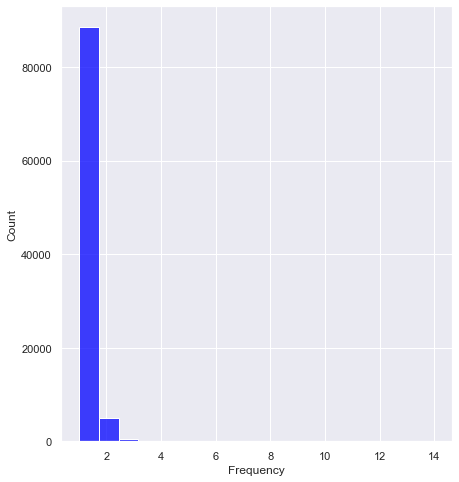

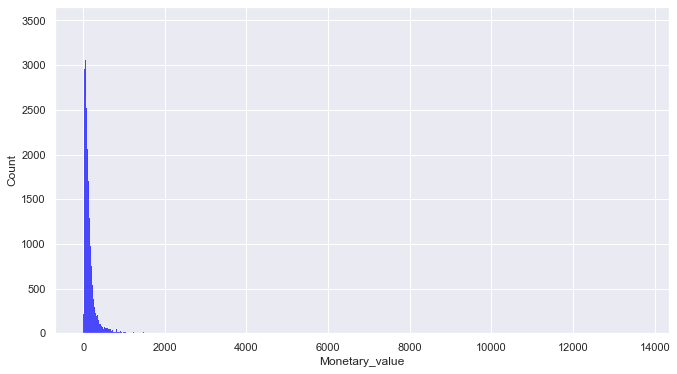

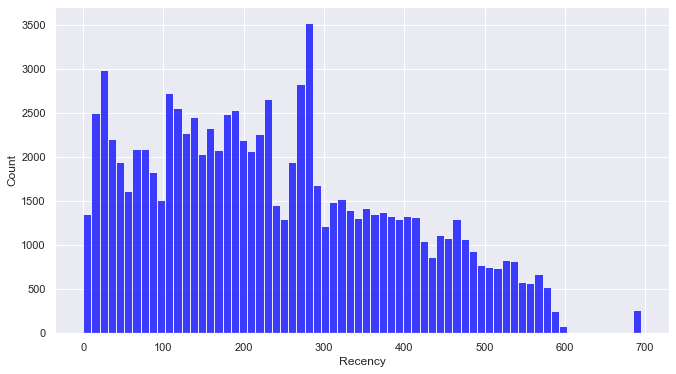

In [9]:
plt.subplots(figsize=(7, 8))

columns_histogram=['Frequency', 'Monetary_value', 'Recency']

for i in rfm_df.columns:
    if i in columns_histogram:
        sns.histplot(data=rfm_df, x=i, color="blue")
        plt.show()

### Heuristic RFM

In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

See reference: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

In the RFM method, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. This is, it depends on the company's rules. For example, a company can give more priority to the Monetary Value. This is used as a rule to compute the RFM Score. So in general, we multiply the terms R, F and M by constant a,b and c, to determine depending on the priorities of the company.

For example:

**a(Recency) + b(Frequency) + c(Monetary Value) = RFM Score**

Rating Customer based upon the RFM Score:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

### Ranking customers based on their Recency, Frequency, and Monetary value

We will normalize the rank of the customers to analyze the ranking.

In [10]:
rfm_df_heuristic_method = rfm_df.copy()

In [11]:
# max: highest rank in the group
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

rfm_df_heuristic_method['R_rank'] = rfm_df_heuristic_method['Recency'].rank(ascending=True)
rfm_df_heuristic_method['F_rank'] = rfm_df_heuristic_method['Frequency'].rank(ascending=True)
rfm_df_heuristic_method['M_rank'] = rfm_df_heuristic_method['Monetary_value'].rank(ascending=True)

In [12]:
# normalizing the rank of the customers 

rfm_df_heuristic_method['R_rank_norm'] = (rfm_df_heuristic_method['R_rank']/rfm_df_heuristic_method['R_rank'].max())
rfm_df_heuristic_method['F_rank_norm'] = (rfm_df_heuristic_method['F_rank']/rfm_df_heuristic_method['F_rank'].max())
rfm_df_heuristic_method['M_rank_norm'] = (rfm_df_heuristic_method['F_rank']/rfm_df_heuristic_method['M_rank'].max())

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
61236,4546caea018ad8c692964e3382debd19,1,196.11,409,78666.5,44267.0,74816.5,0.834884,0.469818,0.469786
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188,40147.5,44267.0,94114.0,0.426083,0.469818,0.469786
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279,60457.5,91017.5,93558.0,0.641632,0.965995,0.965928
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576,93315.5,44267.0,92503.0,0.990353,0.469818,0.469786
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259,54183.0,44267.0,93227.0,0.575042,0.469818,0.469786


In [13]:
rfm_df_heuristic_method.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
count,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000
mean,1.074012,157.112458,238.855468,47114.500000,47114.500000,47114.500000,0.500024,0.500040,0.500005
std,0.362468,215.286394,152.899620,27201.336222,11229.647998,27201.423658,0.288686,0.119183,0.119175
min,1.000000,0.000000,0.000000,6.000000,44267.000000,2.000000,0.000064,0.469818,0.469786
25%,1.000000,60.010000,114.000000,23380.000000,44267.000000,23557.000000,0.248131,0.469818,0.469786
50%,1.000000,103.005000,219.500000,47086.250000,44267.000000,47114.000000,0.499724,0.469818,0.469786
75%,1.000000,174.802500,349.000000,70729.000000,44267.000000,70671.500000,0.750643,0.469818,0.469786
max,14.000000,13664.080000,695.000000,94224.500000,94221.500000,94228.000000,1.000000,1.000000,0.999931


### Calculating RFM score

As we previously mentioned, we need to create a score that is based in heuristic rules where **R + F + M = RFM Score**. Based on this score, we will segment the customers.

We will use the rule:

**40(Recency) + 40(Frequency) + 20(Monetary Value) = RFM Score**

Here we give equally importance to the Recency and the Frequency, this is, to those customers who recently placed orders and bought more than one product in an order. Then, we gave less importance to the Monetary value. 

In [14]:
rfm_df_heuristic_method['RFM_Score'] = 40*rfm_df_heuristic_method['R_rank_norm'] \
                                        + 40*rfm_df_heuristic_method['F_rank_norm'] \
                                        + 20*rfm_df_heuristic_method['M_rank_norm']

rfm_df_heuristic_method['RFM_Score'] *= 0.05

rfm_df_heuristic_method = rfm_df_heuristic_method.round(0)

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
61236,4546caea018ad8c692964e3382debd19,1,196.0,409,78666.0,44267.0,74816.0,1.0,0.0,0.0,3.0
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.0,188,40148.0,44267.0,94114.0,0.0,0.0,0.0,2.0
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1226.0,279,60458.0,91018.0,93558.0,1.0,1.0,1.0,4.0
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.0,576,93316.0,44267.0,92503.0,1.0,0.0,0.0,3.0
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.0,259,54183.0,44267.0,93227.0,1.0,0.0,0.0,3.0


In [15]:
rfm_df_heuristic_method.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000
mean,1.074012,157.116483,238.855468,47114.501910,47114.529821,47114.502292,0.500000,0.060439,0.060439,2.502176
std,0.362468,215.287712,152.899620,27201.327704,11229.765454,27201.426568,0.500003,0.238299,0.238299,0.699358
min,1.000000,0.000000,0.000000,6.000000,44267.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,60.000000,114.000000,23380.000000,44267.000000,23557.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,103.000000,219.500000,47086.000000,44267.000000,47114.000000,0.500000,0.000000,0.000000,2.000000
75%,1.000000,175.000000,349.000000,70729.000000,44267.000000,70671.500000,1.000000,0.000000,0.000000,3.000000
max,14.000000,13664.000000,695.000000,94224.000000,94222.000000,94228.000000,1.000000,1.000000,1.000000,5.000000


Now that we have created a variable for the RFM_Score, we will drop some columns in order to keep only those that are more useful for a table visualization. The idea is create after a variable that contains a name for the customers segments. 

In [16]:
rfm_df_heuristic_method = rfm_df_heuristic_method.drop(columns=['R_rank', 
                                                                'F_rank', 
                                                                'M_rank', 
                                                                'R_rank_norm', 
                                                                'F_rank_norm', 
                                                                'M_rank_norm'])
# rfm_df.describe()

We now asign names to each customer segment according to their RFM_Score, based on:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

In [17]:
rfm_df_heuristic_method["Customer_segment"] = np.where(rfm_df_heuristic_method['RFM_Score'] == 5, "Top customer",
                                                (np.where(rfm_df_heuristic_method['RFM_Score'] == 4, "High value customer",
                                                (np.where(rfm_df_heuristic_method['RFM_Score'] == 3, "Medium value customer",
                                                np.where(rfm_df_heuristic_method['RFM_Score'] > 1.5, 'Low value customer', 'Lost customer'))))))

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
61236,4546caea018ad8c692964e3382debd19,1,196.0,409,3.0,Medium value customer
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.0,188,2.0,Low value customer
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1226.0,279,4.0,High value customer
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.0,576,3.0,Medium value customer
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.0,259,3.0,Medium value customer


In [18]:
df_rfm_df_heuristic_method_stats = rfm_df_heuristic_method.copy()

df_rfm_df_heuristic_method_stats = df_rfm_df_heuristic_method_stats.drop(columns=['customer_unique_id'])

df_rfm_df_heuristic_method_stats = df_rfm_df_heuristic_method_stats.groupby('Customer_segment')[['Frequency', 
                                                                                'Monetary_value', 
                                                                                'Recency',
                                                                                'RFM_Score']].agg([np.mean])

new_df_rfm_df_heuristic_method_stats = df_rfm_df_heuristic_method_stats.copy()

new_df_rfm_df_heuristic_method_stats["size"] = rfm_df_heuristic_method.groupby('Customer_segment')[['Recency']].agg([np.size]) 

new_df_rfm_df_heuristic_method_stats.round(1).head()

,Frequency,Monetary_value,Recency,RFM_Score,size
,mean,mean,mean,mean,
Customer_segment,,,,,
High value customer,2.2,141.1,249.6,4.0,3005
Lost customer,1.0,150.8,13.1,1.0,4021
Low value customer,1.0,159.2,131.2,2.0,44698
Medium value customer,1.0,157.2,369.3,3.0,41091
Top customer,2.3,140.2,468.8,5.0,1413


### Visualizing the customer segments

We will use a pie plot to display all segments of customers.

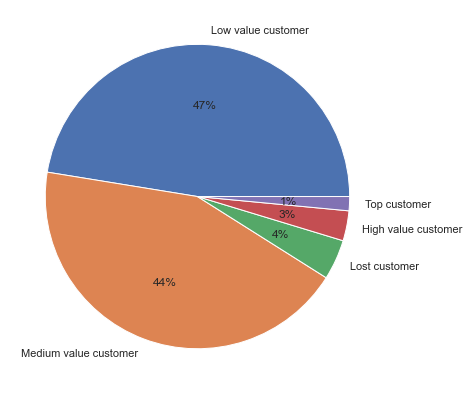

In [19]:
plt.subplots(figsize=(7,7))
plt.pie(rfm_df_heuristic_method.Customer_segment.value_counts(), labels=rfm_df_heuristic_method.Customer_segment.value_counts().index, autopct='%.0f%%')
plt.show()

### RFM quintiles method

We will perform a second method for the customers segmentation based on a quintiles method. As we will further see, this method in principle will allow us to obtain a more detailed segmentation.

In [20]:
rfm_df_quintiles_method =  rfm_df.copy()

In [21]:
rfm_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency
61236,4546caea018ad8c692964e3382debd19,1,196.11,409
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259


### Quintile calculation 

We will calculate the quintile values for the dataframe variables.

In [22]:
quintiles = rfm_df_quintiles_method.quantile(q=[0.20, 0.40, 0.60, 0.80])

print(quintiles)

     Frequency  Monetary_value  Recency
0.2        1.0          52.600     93.0
0.4        1.0          83.500    178.0
0.6        1.0         126.220    269.0
0.8        1.0         199.378    384.0


In [23]:
quintiles = quintiles.to_dict()

quintiles

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary_value': {0.2: 52.6,
  0.4: 83.5,
  0.6: 126.22,
  0.8: 199.37800000000018},
 'Recency': {0.2: 93.0, 0.4: 178.0, 0.6: 269.0, 0.8: 384.0}}

Now we will asign scores for the Recency, Monetary value and Frecuency, asociated to their quintiles. 

In [24]:
def RScore(x,p,d):
    """Returns the Recency score for a value relative to quintile value"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5
    
def FScore(x,p,d):
    """Returns the Frequency score for a value relative to quintile value"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5

def MScore(x,p,d):
    """Returns the Monetary value score for a value relative to quintile value"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5

We will create a dataframe with a new variable for the RFM score.

In [25]:
rfm_df_quintiles_method['R_score'] = rfm_df_quintiles_method['Recency'].apply(RScore, args=('Recency',quintiles))

rfm_df_quintiles_method['F_score'] = rfm_df_quintiles_method['Frequency'].apply(FScore, args=('Frequency',quintiles))

rfm_df_quintiles_method['M_score'] = rfm_df_quintiles_method['Monetary_value'].apply(MScore, args=('Monetary_value',quintiles))

rfm_df_quintiles_method['RFM_Score'] = (rfm_df_quintiles_method["R_score"].astype(str)) \
                                        .str.cat(rfm_df_quintiles_method["F_score"].astype(str)) \
                                        .str.cat(rfm_df_quintiles_method["M_score"].astype(str))

rfm_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score
61236,4546caea018ad8c692964e3382debd19,1,196.11,409,5,1,4,514
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188,3,1,5,315
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279,4,5,5,455
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576,5,1,5,515
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259,3,1,5,315


In [26]:
rfm_df_quintiles_method['RFM_Score'].unique()

array(['514', '315', '455', '515', '215', '115', '415', '355', '255',
       '555', '154', '114', '414', '214', '155', '314', '254', '354',
       '212', '412', '113', '513', '553', '112', '313', '453', '413',
       '411', '153', '454', '451', '554', '213', '111', '312', '353',
       '252', '511', '512', '211', '551', '151', '552', '152', '251',
       '253', '351', '311', '352', '452'], dtype=object)

In [27]:
rfm_df_quintiles_method['RFM_Score'].describe()

count     94228
unique       50
top         412
freq       3797
Name: RFM_Score, dtype: object

### Customers segmentation

The RFM scores give us 5^(3) = 125 segments. Which is not easy to work with. 

See reference: https://www.researchgate.net/publication/338961311_Customer_Segmentation_Based_On_Recency_Frequency_Monetary_Model_A_Case_Study_in_E-Retailing

We can also work on the segmentation by creating a new feature 'FM score', that is the rounded down mean of Frequency and Monetary value scores.

See reference: https://practicaldatascience.co.uk/data-science/how-to-visualise-rfm-data-using-treemaps

See reference: https://medium.com/analytics-vidhya/customer-segmentation-analysis-with-rfm-using-python-and-power-bi-1a93e7938053

We are going to keep 10 segments based on the Recency and Frequency scores. Here is the description of the segments:

* Champions: Bought recently, buy often and spend the most.
* Loyal Customers: Buy on a regular basis. Responsive to promotions.
* Potential Loyalists: Recent customers with average frequency.
* Recent Customers: Bought most recently, but not often.
* Customers Needing Attention: Above average recency, frequency and monetary values. May not have bought very recently though.
* At Risk: Purchased often but a long time ago. Need to bring them back.
* Can't Lose Them: Used to purchase frequently but haven't returned for a long time.
* About To Sleep: Below average recency and frequency. Will lose them if not reactivated.
* Hibernating: Last purchase was long back and low number of orders.
* Lost Customers: Purchased long time ago and never came back.

See reference: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [28]:
rfm_new_df_quintiles_method = rfm_df_quintiles_method.copy()

We create a new variable for 'FM score' that is the rounded down mean of Frequency and Monetary value scores.

In [29]:
import math

def truncate(x): return math.trunc(x)

rfm_new_df_quintiles_method['FM_score'] = ((rfm_new_df_quintiles_method['F_score'] + rfm_new_df_quintiles_method['M_score'])/2).apply(lambda x: truncate(x))

In [30]:
rfm_new_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score,FM_score
61236,4546caea018ad8c692964e3382debd19,1,196.11,409,5,1,4,514,2
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188,3,1,5,315,3
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279,4,5,5,455,5
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576,5,1,5,515,3
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259,3,1,5,315,3


In [31]:
rfm_new_df_quintiles_method.describe()

,Frequency,Monetary_value,Recency,R_score,F_score,M_score,FM_score
count,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000,94228.000000
mean,1.074012,157.112458,238.855468,2.996912,1.241754,2.999926,1.920873
std,0.362468,215.286394,152.899620,1.414627,0.953195,1.414255,0.884683
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,60.010000,114.000000,2.000000,1.000000,2.000000,1.000000
50%,1.000000,103.005000,219.500000,3.000000,1.000000,3.000000,2.000000
75%,1.000000,174.802500,349.000000,4.000000,1.000000,4.000000,2.000000
max,14.000000,13664.080000,695.000000,5.000000,5.000000,5.000000,5.000000


We will create the customers segments according to their R_score and FM_score. Each customer has a description based on their behavior associated to their R_Score and FM_score.

In [32]:
segt_map = {
            # 'R, FM':
            r'11': 'Lost Customers', # Purchased long time ago and never came back.
            r'12': 'Hibernating', # Last purchase was long back and low number of orders.
            r'21': 'About To Sleep', # Below average recency and frequency. Will lose them if not reactivated.
            r'[1-2][1-3]': 'Can\'t Lose Them', # Used to purchase frequently but haven't returned for a long time.
            r'[1-2][3-5]': 'At Risk', # Purchased often but a long time ago. Need to bring them back.
            r'[2-3][1-2]': 'Customers Needing Attention', # Above average recency, frequency and monetary values. May not have bought very recently though.
            r'[3-5][1-2]': 'Recent customers', # Bought most recently, but not often.
            r'[3-5][3-5]': 'Potential Loyalists', # Recent customers with average frequency.
            r'[4-5][4-5]': 'Loyal Customers', # Buy on a regular basis. Responsive to promotions.
            r'55': 'Champions' # Bought recently, buy often and spend the most.
            }

rfm_new_df_quintiles_method['Segment_name'] = rfm_new_df_quintiles_method['R_score'].map(str) + rfm_new_df_quintiles_method['FM_score'].map(str)

rfm_new_df_quintiles_method['Segment_name'] = rfm_new_df_quintiles_method['Segment_name'].replace(segt_map, regex=True)

rfm_new_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score,FM_score,Segment_name
61236,4546caea018ad8c692964e3382debd19,1,196.11,409,5,1,4,514,2,Recent customers
59093,c402f431464c72e27330a67f7b94d4fb,1,2202.40,188,3,1,5,315,3,Potential Loyalists
33154,0f5ac8d5c31de21d2f25e24be15bbffb,2,1225.65,279,4,5,5,455,5,Potential Loyalists
73565,11f97da02237a49c8e783dfda6f50e8e,1,783.00,576,5,1,5,515,3,Potential Loyalists
73115,31e412b9fb766b6794724ed17a41dfa6,1,1014.02,259,3,1,5,315,3,Potential Loyalists


### Visualizing the customer segments

In [33]:
df_quintiles_method_stats = rfm_new_df_quintiles_method.copy()

df_quintiles_method_stats = df_quintiles_method_stats.drop(columns=['customer_unique_id',
                                                                    'RFM_Score'])

df_quintiles_method_stats = df_quintiles_method_stats.groupby('Segment_name')[['Frequency', 
                                                                                'Monetary_value', 
                                                                                'Recency',
                                                                                'R_score', 
                                                                                'F_score', 
                                                                                'M_score', 
                                                                                'FM_score']].agg([np.mean])

In [34]:
new_df_quintiles_method_stats = df_quintiles_method_stats.copy()

new_df_quintiles_method_stats["size"] = rfm_new_df_quintiles_method.groupby('Segment_name')[['Recency']].agg([np.size]) 

new_df_quintiles_method_stats.round(1).head(11)

,Frequency,Monetary_value,Recency,R_score,F_score,M_score,FM_score,size
,mean,mean,mean,mean,mean,mean,mean,
Segment_name,,,,,,,,
About To Sleep,1.0,52.0,136.7,2.0,1.0,1.5,1.0,6894
At Risk,2.2,216.7,95.9,1.5,5.0,4.0,4.3,1101
Can't Lose Them,1.1,270.1,112.9,1.7,1.2,4.1,2.5,15422
Customers Needing Attention,1.0,91.2,221.6,3.0,1.0,2.5,1.5,14206
Hibernating,1.0,131.3,45.9,1.0,1.0,3.5,2.0,7424
Lost Customers,1.0,51.9,44.4,1.0,1.0,1.5,1.0,6956
Potential Loyalists,1.3,341.9,341.1,4.0,2.1,4.4,3.2,14267
Recent customers,1.0,90.6,395.4,4.5,1.0,2.5,1.5,27958


We now visualize the customers segmented according to their corresponding scores.

<AxesSubplot:xlabel='count', ylabel='Segment_name'>

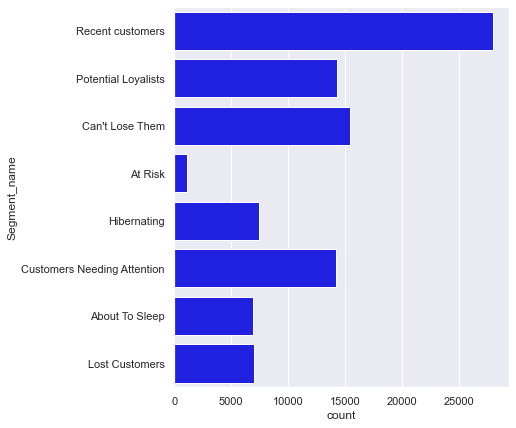

In [35]:
plt.subplots(figsize=(6, 7))

sns.countplot(y="Segment_name", data=rfm_new_df_quintiles_method, color="blue")

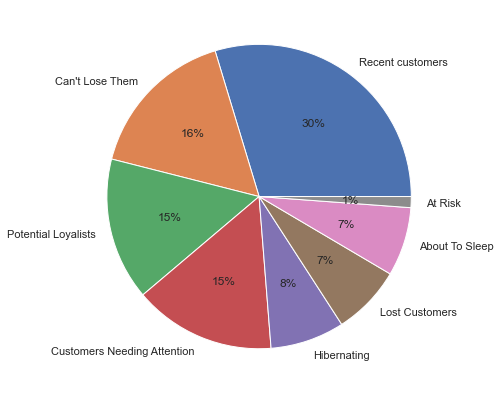

In [36]:
plt.subplots(figsize=(7,7))
plt.pie(rfm_new_df_quintiles_method.Segment_name.value_counts(), labels=rfm_new_df_quintiles_method.Segment_name.value_counts().index, autopct='%.0f%%')
plt.show()

We will now create a new treemap dataframe to visualize the segmentation that we have just performed.

In [44]:
df_treemap_new = rfm_new_df_quintiles_method.groupby('Segment_name').agg(size=('customer_unique_id', 'count')).reset_index()

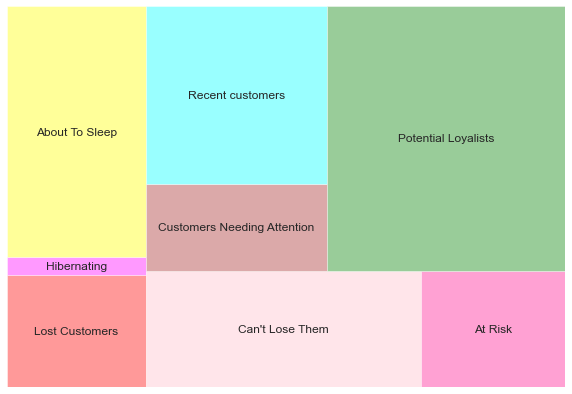

In [38]:
import squarify
fig, ax = plt.subplots(1, figsize = (10,7))

squarify.plot(sizes=df_treemap_new['size'], 
                label=["Lost Customers", 
                        "Hibernating", 
                        "About To Sleep", 
                        "Can\'t Lose Them", 
                        "At Risk",
                        "Customers Needing Attention", 
                        "Recent customers", 
                        "Potential Loyalists", 
                        "Loyal Customers", 
                        "Champions"], alpha=.4,
                color=["red",
                        "magenta",
                        "yellow",
                        "pink",
                        "deeppink",
                        "brown",
                        "cyan",
                        "green",
                        "blue",
                        "mediumblue"])

plt.axis('off')

plt.show()

We will create a new dataframe in which we will try to compare the new segments with the five more general ones created initially.

In [39]:
rfm_new_df_for_new_merge = rfm_new_df_quintiles_method.copy()

rfm_new_df_for_new_merge = rfm_new_df_for_new_merge.drop(columns=['Frequency', 
                                                                    'Monetary_value', 
                                                                    'Recency',  
                                                                    'F_score', 
                                                                    'M_score', 
                                                                    'RFM_Score'])

In [40]:
rfm_new_df_for_automatic_segmentation = pd.merge(rfm_new_df_for_new_merge, rfm_df_heuristic_method, on='customer_unique_id')

rfm_new_df_for_automatic_segmentation.head()

,customer_unique_id,R_score,FM_score,Segment_name,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
0,4546caea018ad8c692964e3382debd19,5,2,Recent customers,1,196.0,409,3.0,Medium value customer
1,c402f431464c72e27330a67f7b94d4fb,3,3,Potential Loyalists,1,2202.0,188,2.0,Low value customer
2,0f5ac8d5c31de21d2f25e24be15bbffb,4,5,Potential Loyalists,2,1226.0,279,4.0,High value customer
3,0f5ac8d5c31de21d2f25e24be15bbffb,4,5,Potential Loyalists,2,319.0,275,4.0,High value customer
4,0f5ac8d5c31de21d2f25e24be15bbffb,4,5,Potential Loyalists,2,1226.0,279,4.0,High value customer


In [41]:
rfm_new_df_for_automatic_segmentation.describe()

,R_score,FM_score,Frequency,Monetary_value,Recency,RFM_Score
count,101202.000000,101202.000000,101202.000000,101202.000000,101202.000000,101202.000000
mean,3.014674,2.048369,1.196340,156.108792,240.619622,2.608081
std,1.413176,0.993533,0.808539,212.527834,152.926664,0.799751
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,60.000000,117.000000,2.000000
50%,3.000000,2.000000,1.000000,103.000000,222.000000,3.000000
75%,4.000000,3.000000,1.000000,174.000000,351.000000,3.000000
max,5.000000,5.000000,14.000000,13664.000000,695.000000,5.000000


In [42]:
rfm_new_df_for_automatic_segmentation = rfm_new_df_for_automatic_segmentation.drop(columns=['Customer_segment',
                                                                                            'R_score',
                                                                                            'FM_score'])  

## Pickling dataframes

In [43]:
# To pickle the data frame

new_df_for_segmentation_analysis.to_pickle("./pickle_data_automatic_segmentation.pkl")

rfm_new_df_for_automatic_segmentation.to_pickle("./pickle_data_RFM_segmentation.pkl")